In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud  # 사이킷런 데이타셋


In [3]:
data = load_linnerud()

In [4]:
data

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [5]:
df = pd.concat([pd.DataFrame(data.data, columns=data.feature_names),
                pd.DataFrame(data.target, columns=data.target_names)],
               axis=1)
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [6]:
df.columns

Index(['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse'], dtype='object')

In [7]:
df.shape

(20, 6)

In [8]:
df['Weight'] = data.target

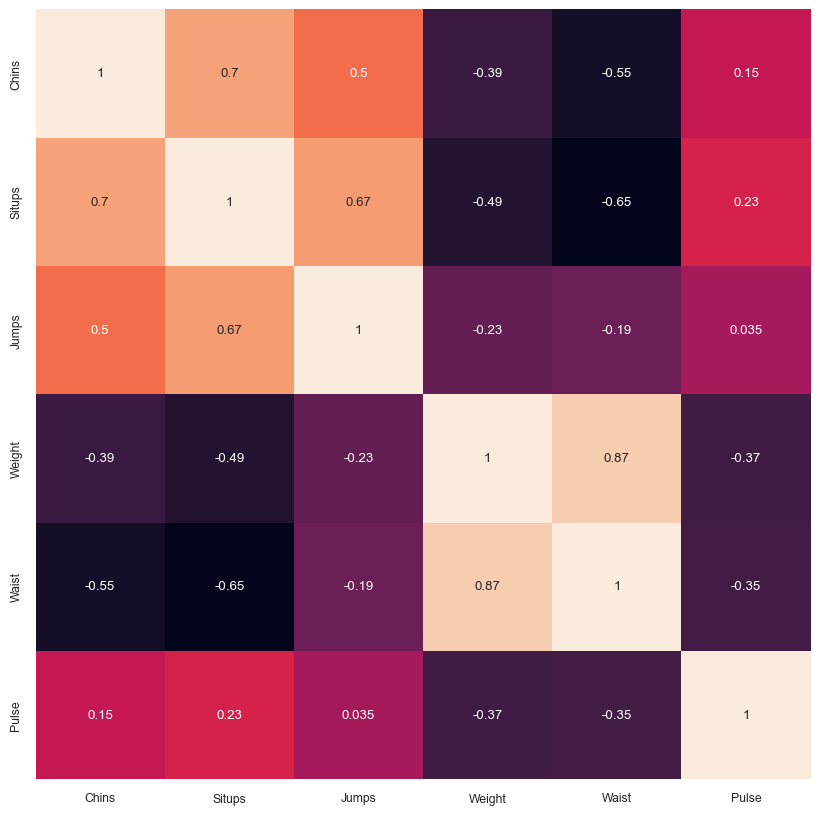

In [9]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [100]:
# 데이터 분할
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder =  LabelEncoder()

X = df.drop(['Chins','Situps','Jumps'], axis=1)
y = df['Weight']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
X_train.shape

(16, 3)

In [102]:
y_train.shape

(16,)

In [103]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [104]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (3,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                256       
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 dense_86 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [105]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 745ms/step - loss: 32696.7070 - mse: 32696.7070 - val_loss: 31990.4238 - val_mse: 31990.4238
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 32639.6934 - mse: 32639.6934 - val_loss: 31936.8203 - val_mse: 31936.8203
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 32595.9062 - mse: 32595.9062 - val_loss: 31891.1758 - val_mse: 31891.1758
Epoch 4/100
1/1 [==============================] - 0s 39ms/step - loss: 32558.5176 - mse: 32558.5176 - val_loss: 31850.2852 - val_mse: 31850.2852
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 32525.2090 - mse: 32525.2090 - val_loss: 31812.7109 - val_mse: 31812.7109
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 32494.2344 - mse: 32494.2344 - val_loss: 31777.9375 - val_mse: 31777.9375
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 32464.4141 - mse: 32464.4141 - val_loss: 31745.0078

Epoch 57/100
1/1 [==============================] - 0s 44ms/step - loss: 30856.0859 - mse: 30856.0859 - val_loss: 29966.0781 - val_mse: 29966.0781
Epoch 58/100
1/1 [==============================] - 0s 34ms/step - loss: 30813.1445 - mse: 30813.1445 - val_loss: 29920.2109 - val_mse: 29920.2109
Epoch 59/100
1/1 [==============================] - 0s 35ms/step - loss: 30769.4648 - mse: 30769.4648 - val_loss: 29873.7754 - val_mse: 29873.7754
Epoch 60/100
1/1 [==============================] - 0s 33ms/step - loss: 30725.3359 - mse: 30725.3359 - val_loss: 29826.6562 - val_mse: 29826.6562
Epoch 61/100
1/1 [==============================] - 0s 24ms/step - loss: 30680.7207 - mse: 30680.7207 - val_loss: 29778.9844 - val_mse: 29778.9844
Epoch 62/100
1/1 [==============================] - 0s 33ms/step - loss: 30635.5742 - mse: 30635.5742 - val_loss: 29730.7422 - val_mse: 29730.7422
Epoch 63/100
1/1 [==============================] - 0s 47ms/step - loss: 30589.9004 - mse: 30589.9004 - val_loss: 2968

In [107]:
test_mae_score

0.09013508260250092

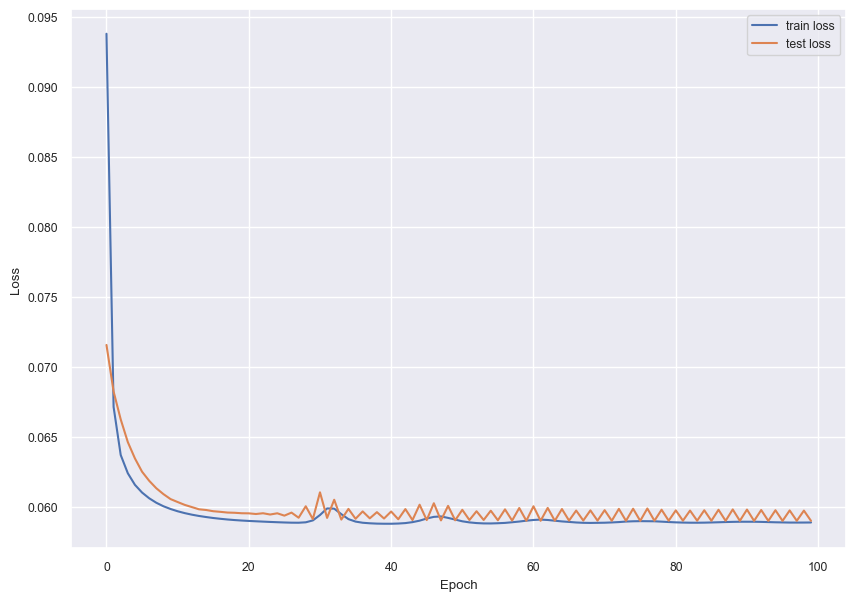

In [98]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

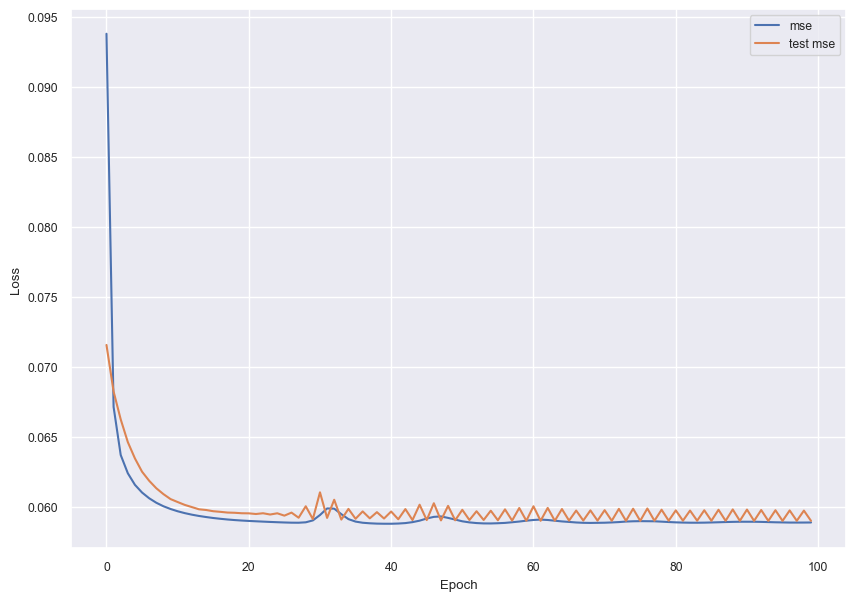

In [99]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()